Importing the necessary libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore

Loading the dataset

In [ ]:
data = pd.read_csv('/content/city_day.csv')
print(data)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  01-01-2015    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  02-01-2015    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  03-01-2015    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  04-01-2015    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  05-01-2015    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  27-06-2020  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  28-06-2020  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  29-06-2020  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  30-06-2020  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  01-07-2020  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

Showing the first five rows

In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Displaying the last five rows in the dataset

In [ ]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01-07-2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


Checking the information in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Finding the missing values

In [ ]:
print("Missing values in each column:")
data.isnull().sum()

Missing values in each column:


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


Summary statistics of the dataset

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
data_cleaned = data[num_cols].dropna()

In [ ]:
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=num_cols)

In [ ]:
min_max_scaler = MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(data_cleaned), columns=num_cols)

In [ ]:
data_zscore = data_cleaned.apply(zscore)
print(data_zscore)

          PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
2123   0.373755  0.012609 -0.777351 -0.596735 -0.743774 -0.622684 -0.637397   
2124   0.316405  0.065766 -0.786335 -0.303909 -0.642628 -0.650035 -0.622649   
2125   0.510799  0.138739 -0.519818 -0.045691 -0.389943 -0.486549 -0.644772   
2126   0.053116 -0.225312 -0.721453 -0.193701 -0.563755 -0.579170 -0.659521   
2127   0.207477 -0.099998 -0.588194 -0.452984 -0.579091 -0.527576 -0.607900   
...         ...       ...       ...       ...       ...       ...       ...   
29525 -0.999851 -1.062525 -0.554256 -0.449257 -0.557182 -0.595954 -0.386670   
29526 -0.862248 -0.844887 -0.465916 -0.353956 -0.471372 -0.513900 -0.379295   
29527 -0.687964 -0.575025 -0.678530 -0.300715 -0.581282 -0.543738 -0.342424   
29528 -0.715336 -0.672479 -0.677033 -0.115969 -0.515555 -0.623306 -0.371921   
29529 -0.832084 -0.856195 -0.647087 -0.130344 -0.498393 -0.665576 -0.342424   

            SO2        O3   Benzene   Toluene    Xy

In [ ]:
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
data_iqr = data_cleaned[~((data_cleaned < lower_bound) | (data_cleaned > upper_bound)).any(axis=1)]
print(data_iqr)

       PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  \
2137   74.28  141.22  6.10  44.97  28.88  15.73  0.09  21.90  60.62     0.26   
2138   50.32  102.77  1.73  33.85  19.41  12.56  0.10  13.65  68.15     0.20   
2139   58.47  115.27  4.93  41.64  26.15  15.20  0.16  18.37  73.75     0.23   
2140   89.35  131.48  7.97  42.10  28.88  21.24  0.24   7.42  44.67     0.28   
2141   64.42   99.74  7.20  34.78  24.36  17.63  0.15   5.81  50.16     0.24   
...      ...     ...   ...    ...    ...    ...   ...    ...    ...      ...   
29525   7.63   32.27  5.91  23.27  17.19  11.15  0.46   6.87  19.90     1.45   
29526  15.02   50.94  7.68  25.06  19.54  12.47  0.47   8.55  23.30     2.24   
29527  24.38   74.09  3.42  26.06  16.53  11.99  0.52  12.72  30.14     0.74   
29528  22.91   65.73  3.45  29.53  18.33  10.71  0.48   8.42  30.96     0.01   
29529  16.64   49.97  4.05  29.26  18.80  10.03  0.52   9.84  28.30     0.00   

       Toluene  Xylene    AQI  
2137   

In [ ]:
data_standardized.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.373755,0.012609,-0.777351,-0.596735,-0.743774,-0.622684,-0.637397,0.519929,4.652297,-0.691531,-0.311218,-0.550740,0.468988
1,0.316405,0.065766,-0.786335,-0.303909,-0.642628,-0.650035,-0.622649,2.155536,4.158745,-0.687580,-0.193200,-0.546330,0.609178
2,0.510799,0.138739,-0.519818,-0.045691,-0.389943,-0.486549,-0.644772,3.080798,3.870797,-0.673751,-0.219245,-0.537509,0.619962
3,0.053116,-0.225312,-0.721453,-0.193701,-0.563755,-0.579170,-0.659521,1.044663,5.219499,-0.697458,-0.431678,-0.548535,0.512123
4,0.207477,-0.099998,-0.588194,-0.452984,-0.579091,-0.527576,-0.607900,-0.134592,3.764926,-0.689556,-0.456909,-0.546330,0.350366


In [ ]:
data_standardized.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
6231,-0.999851,-1.062525,-0.554256,-0.449257,-0.557182,-0.595954,-0.386670,-0.648162,-0.829971,-0.444581,-0.403191,-0.244215,-1.008398
6232,-0.862248,-0.844887,-0.465916,-0.353956,-0.471372,-0.513900,-0.379295,-0.413706,-0.656076,-0.288509,0.142135,-0.402990,-1.073101
6233,-0.687964,-0.575025,-0.678530,-0.300715,-0.581282,-0.543738,-0.342424,0.168246,-0.306242,-0.584849,-0.660389,-0.480173,-0.760369
6234,-0.715336,-0.672479,-0.677033,-0.115969,-0.515555,-0.623306,-0.371921,-0.431848,-0.264303,-0.729068,-0.839451,-0.563971,-0.781937
6235,-0.832084,-0.856195,-0.647087,-0.130344,-0.498393,-0.665576,-0.342424,-0.233678,-0.400350,-0.731043,-0.840265,-0.563971,-0.932911


In [ ]:
data_normalized.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.124610,0.147894,0.007486,0.145214,0.053189,0.063633,0.007394,0.208525,0.780819,0.003104,0.063107,0.000479,0.246177
1,0.119776,0.153673,0.006353,0.184500,0.065559,0.060992,0.008626,0.376722,0.720799,0.003414,0.077184,0.000639,0.266055
2,0.136160,0.161606,0.039945,0.219143,0.096463,0.076780,0.006778,0.471871,0.685782,0.004500,0.074078,0.000959,0.267584
3,0.097585,0.122028,0.014531,0.199286,0.075205,0.067835,0.005545,0.262486,0.849795,0.002638,0.048738,0.000559,0.252294
4,0.110595,0.135652,0.031327,0.164500,0.073330,0.072818,0.009858,0.141217,0.672907,0.003259,0.045728,0.000639,0.229358


In [ ]:
data_normalized.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
6231,0.008836,0.031011,0.035604,0.165000,0.076009,0.066214,0.028343,0.088404,0.114131,0.022502,0.052136,0.011583,0.036697
6232,0.020433,0.054671,0.046738,0.177786,0.086504,0.074139,0.028959,0.112514,0.135278,0.034761,0.117184,0.005832,0.027523
6233,0.035123,0.084009,0.019941,0.184929,0.073062,0.071257,0.032039,0.172359,0.177821,0.011484,0.021456,0.003036,0.071865
6234,0.032816,0.073415,0.020130,0.209714,0.081100,0.063573,0.029575,0.110649,0.182921,0.000155,0.000097,0.000000,0.068807
6235,0.022976,0.053442,0.023904,0.207786,0.083199,0.059491,0.032039,0.131028,0.166376,0.000000,0.000000,0.000000,0.047401


In [ ]:
data_zscore.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,0.373755,0.012609,-0.777351,-0.596735,-0.743774,-0.622684,-0.637397,0.519929,4.652297,-0.691531,-0.311218,-0.550740,0.468988
2124,0.316405,0.065766,-0.786335,-0.303909,-0.642628,-0.650035,-0.622649,2.155536,4.158745,-0.687580,-0.193200,-0.546330,0.609178
2125,0.510799,0.138739,-0.519818,-0.045691,-0.389943,-0.486549,-0.644772,3.080798,3.870797,-0.673751,-0.219245,-0.537509,0.619962
2126,0.053116,-0.225312,-0.721453,-0.193701,-0.563755,-0.579170,-0.659521,1.044663,5.219499,-0.697458,-0.431678,-0.548535,0.512123
2127,0.207477,-0.099998,-0.588194,-0.452984,-0.579091,-0.527576,-0.607900,-0.134592,3.764926,-0.689556,-0.456909,-0.546330,0.350366


In [ ]:
data_zscore.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29525,-0.999851,-1.062525,-0.554256,-0.449257,-0.557182,-0.595954,-0.386670,-0.648162,-0.829971,-0.444581,-0.403191,-0.244215,-1.008398
29526,-0.862248,-0.844887,-0.465916,-0.353956,-0.471372,-0.513900,-0.379295,-0.413706,-0.656076,-0.288509,0.142135,-0.402990,-1.073101
29527,-0.687964,-0.575025,-0.678530,-0.300715,-0.581282,-0.543738,-0.342424,0.168246,-0.306242,-0.584849,-0.660389,-0.480173,-0.760369
29528,-0.715336,-0.672479,-0.677033,-0.115969,-0.515555,-0.623306,-0.371921,-0.431848,-0.264303,-0.729068,-0.839451,-0.563971,-0.781937
29529,-0.832084,-0.856195,-0.647087,-0.130344,-0.498393,-0.665576,-0.342424,-0.233678,-0.400350,-0.731043,-0.840265,-0.563971,-0.932911


In [ ]:
data_iqr.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2137,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0
2138,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0
2139,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0
2140,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0
2141,64.42,99.74,7.20,34.78,24.36,17.63,0.15,5.81,50.16,0.24,6.11,0.14,145.0


In [ ]:
data_iqr.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29525,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


Visualize the distribution of various pollutants

In [ ]:
pollutants = ['PM10', 'PM2.5', 'NO2', 'SO2', 'O3']
for pollutant in pollutants:
    fig = px.histogram(data, x=pollutant, nbins=50, title=f'Distribution of {pollutant}',labels={pollutant: pollutant}, marginal='box')
    fig.update_layout(yaxis_title='Frequency', xaxis_title=pollutant)
    fig.show()

Check the correlation matrix

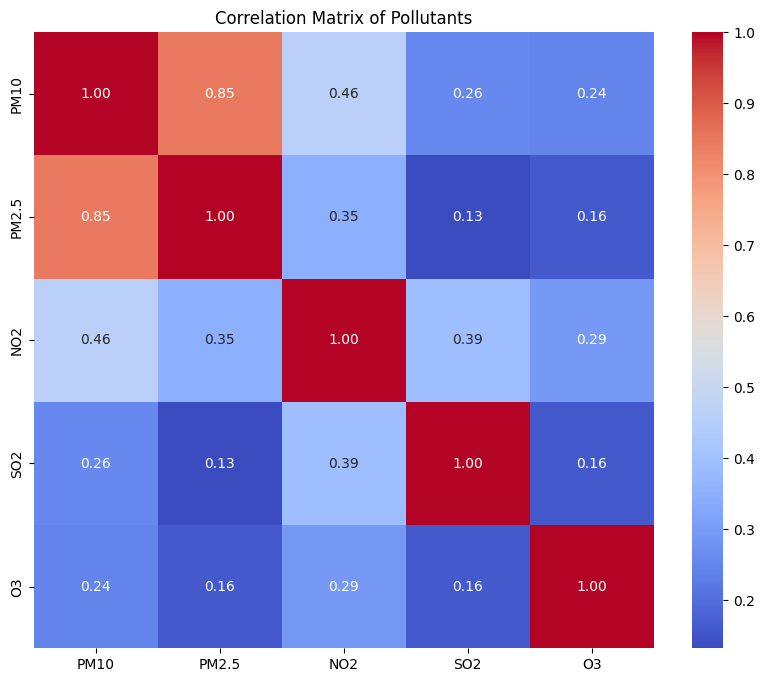

In [ ]:
plt.figure(figsize=(10, 8))
correlation = data[pollutants].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Pollutants")
plt.show()

Pairplot for visualizing relationships between pollutants

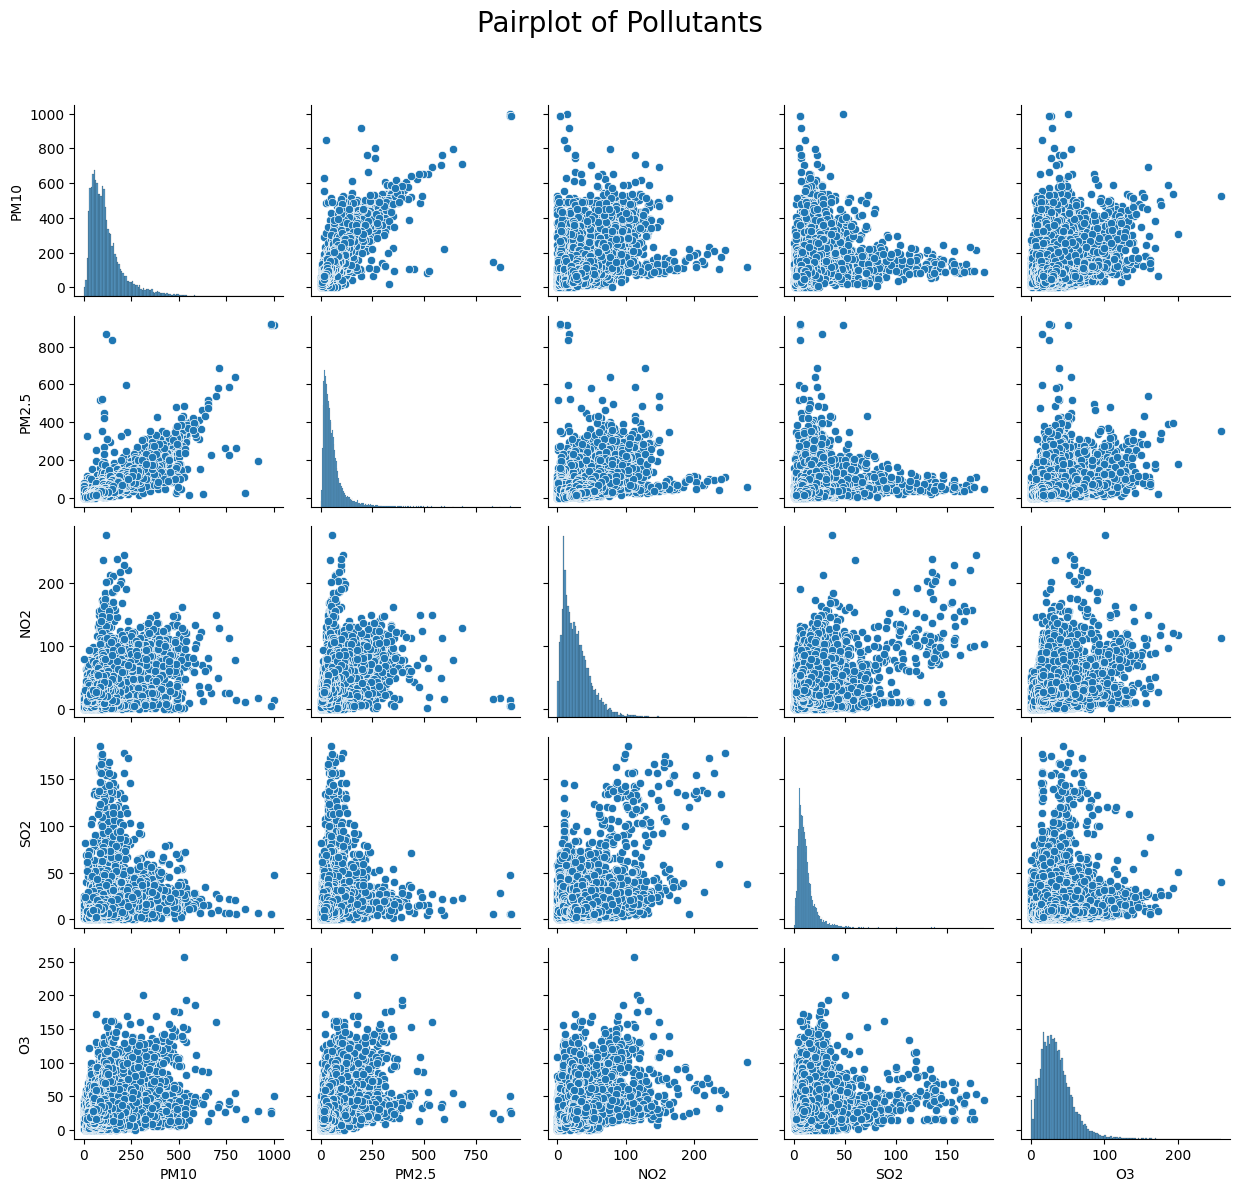

In [ ]:
sns.pairplot(data[pollutants].dropna())
plt.suptitle("Pairplot of Pollutants",fontsize=20, x=0.5, ha='center')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()